In [180]:
import pandas as pd
import os
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
sns.set_theme(style="darkgrid")

<Axes: xlabel='Temp', ylabel='Price'>

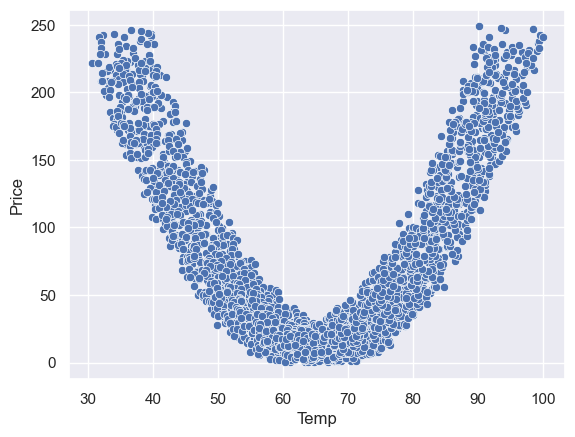

In [216]:

import random as rand
temps = []
prices = []
med = 60
n = 2
temp = 30
while temp <= 90:
    for i in range(0, 3-int(abs(60-temp) // 15)):
        price = ((temp-med)**2 + rand.random()*100)*(1/4)
        prices.append(price)
        temps.append(rand.random()*10 + temp)
    temp += 0.05

df = pd.DataFrame({"Price": prices, "Temp": temps})
sns.scatterplot(df, x="Temp", y = "Price")

<Axes: xlabel='Date', ylabel='simTemp'>

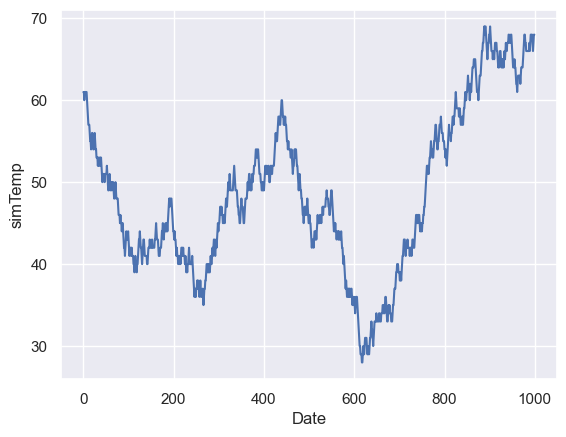

In [217]:
dates = []
simTemps = []
curr_value = 60
for date in range(0,1000):
    if curr_value > 100:
        curr_value -= 1
    else:
        curr_value = curr_value + rand.randint(-1, 1)
    dates.append(date)
    simTemps.append(curr_value)

sim_df = pd.DataFrame({"Date": dates, "simTemp": simTemps})
sns.lineplot(sim_df, x="Date", y = "simTemp")

In [218]:
sim_df["Pred_Price"] = 0
for idx, row in sim_df.iterrows():
    sim_temp = row["simTemp"]
    closest_idx = 0
    closest_distance = 100000000
    for real_idx, real_row in df.iterrows():
        real_temp = real_row["Temp"]
        if (dist:= abs(real_temp - sim_temp)) < closest_distance:
            closest_idx = real_idx
            closest_distance = dist
    sim_df.at[idx, "Pred_Price"] = df.at[closest_idx, "Price"]


/tmp/ipykernel_12065/4124201025.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.13289155289892' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sim_df.at[idx, "Pred_Price"] = df.at[closest_idx, "Price"]


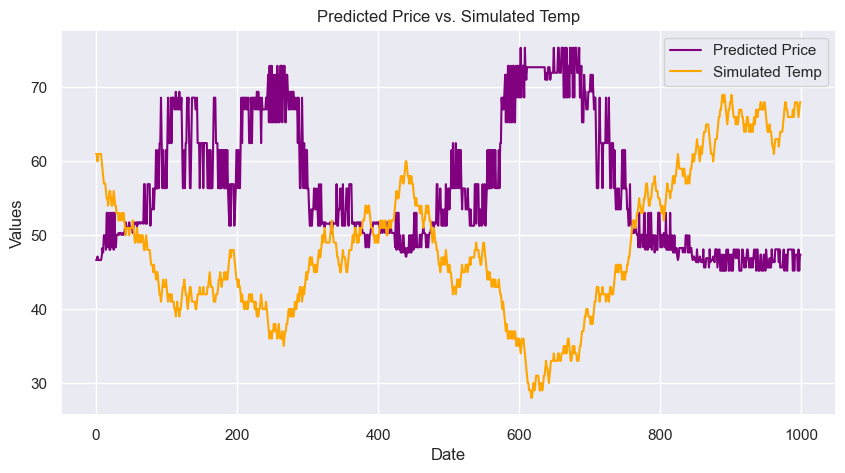

In [219]:
plt.figure(figsize=(10, 5))

# Plot both lines on the same axis
sns.lineplot(data=sim_df, x="Date", y=sim_df["Pred_Price"]*(1/8)+45, label="Predicted Price", color="purple")
sns.lineplot(data=sim_df, x="Date", y="simTemp", label="Simulated Temp", color="orange")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Predicted Price vs. Simulated Temp")
plt.legend()

# Show the plot
plt.show()

In [ ]:
sim_df.Pred_Price.tail()

995    507.477164
996    378.332231
997    521.087178
998    521.497162
999    638.879876
Name: Pred_Price, dtype: float64

In [210]:
sim_df.simTemp.tail()

995    48
996    47
997    46
998    45
999    44
Name: simTemp, dtype: int64

In [220]:
sim_df.to_csv("/home/csinger/cmu/analysis/sim_data.csv")